# Пример обучения с учителем
## Классификация

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from kagglehub import KaggleDatasetAdapter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report, 
                           roc_auc_score, roc_curve)
from sklearn.model_selection import cross_val_score

### Загружаем данные

Heart Disease UCI - данные о пациентах с риском сердечных заболеваний

Целевая переменная: target (0 = нет заболевания, 1 = есть заболевание)

**Признаки:**
1. age - возраст
2. sex - пол (1 = мужчина, 0 = женщина)
3. cp - тип боли в груди (0-3)
4. trestbps - давление в покое
5. chol - холестерин
6. fbs - сахар крови натощак > 120 мг/дл (1 = да, 0 = нет)
7. restecg - результаты ЭКГ в покое
8. thalach - максимальный пульс
9. exang - стенокардия при нагрузке (1 = да, 0 = нет)
10. oldpeak - депрессия ST сегмента
11. slope - наклон пика ST сегмента
12. ca - количество основных сосудов
13. thal - талассемия (3 = норма, 6 = фиксированный дефект, 7 = обратимый дефект)

In [113]:
df = pd.read_csv("./heart.csv")
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [114]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Визуализация основных моментов

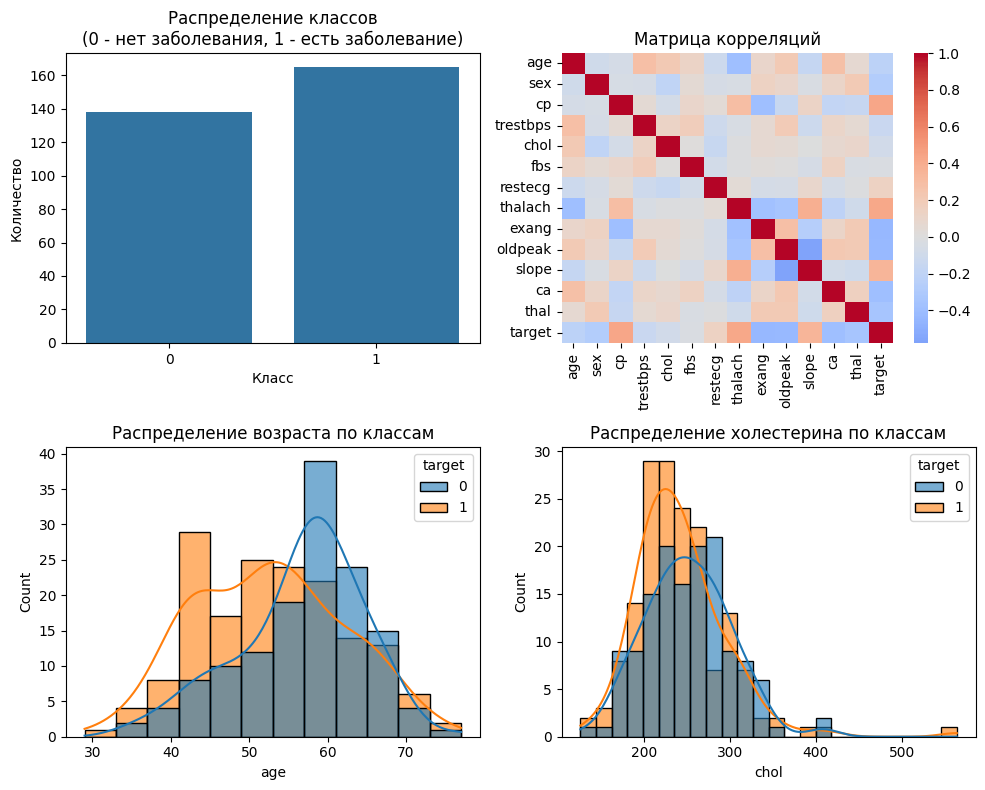

In [115]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.countplot(x='target', data=df)
plt.title('Распределение классов\n(0 - нет заболевания, 1 - есть заболевание)')
plt.xlabel('Класс')
plt.ylabel('Количество')

plt.subplot(2, 2, 2)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Матрица корреляций')

plt.subplot(2, 2, 3)
sns.histplot(data=df, x='age', hue='target', kde=True, alpha=0.6)
plt.title('Распределение возраста по классам')

plt.subplot(2, 2, 4)
sns.histplot(data=df, x='chol', hue='target', kde=True, alpha=0.6)
plt.title('Распределение холестерина по классам')

plt.tight_layout()
plt.show()

### Определяем стобцы признаков и таргета

In [116]:
target_col = "target"
target_names = ["healthy", "sick"]
feature_col = df.columns.drop(target_col)
print("target column:", target_col)
print("target values:", target_names)
print("features columns:", feature_col)

X = df.drop('target', axis=1)
y = df['target']

print(f"Размерность данных: {X.shape}")
print(f"Количество классов: {len(np.unique(y))}")
print(f"Названия классов: {target_names}")
print(f"Количество признаков: {len(feature_col)}")

target column: target
target values: ['healthy', 'sick']
features columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Размерность данных: (303, 13)
Количество классов: 2
Названия классов: ['healthy', 'sick']
Количество признаков: 13


### Информация о данных

In [117]:
df['target_name'] = df['target'].map({0: 'malignant', 1: 'benign'})

print("Информация о данных:")
print(df.info())
print("\nСтатистика числовых признаков:")
print(df.describe())

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    int64  
 2   cp           303 non-null    int64  
 3   trestbps     303 non-null    int64  
 4   chol         303 non-null    int64  
 5   fbs          303 non-null    int64  
 6   restecg      303 non-null    int64  
 7   thalach      303 non-null    int64  
 8   exang        303 non-null    int64  
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    int64  
 11  ca           303 non-null    int64  
 12  thal         303 non-null    int64  
 13  target       303 non-null    int64  
 14  target_name  303 non-null    object 
dtypes: float64(1), int64(13), object(1)
memory usage: 35.6+ KB
None

Статистика числовых признаков:
              age         sex          cp    trestbps      

### Делим на train и test

In [118]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nРазмер train: {X_train.shape}")
print(f"Размер test: {X_test.shape}")


Размер train: (242, 13)
Размер test: (61, 13)


### Нормализуем признаки

In [119]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Гребневый классификатор
lin_clf = RidgeClassifier(random_state=42, max_iter=1000)
lin_clf.fit(X_train_scaled, y_train)

# Логистическая регрессия
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# SVM с линейным ядром
svm_linear = SVC(kernel='linear', random_state=42, probability=True)
svm_linear.fit(X_train_scaled, y_train)

# SVM с RBF ядром (нелинейный)
svm_rbf = SVC(kernel='rbf', random_state=42, probability=True)
svm_rbf.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [121]:
# Предсказания
y_pred_lin = lin_clf.predict(X_test_scaled)
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_svm_linear = svm_linear.predict(X_test_scaled)
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)

# Вероятности для ROC AUC
y_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]
y_proba_svm_linear = svm_linear.predict_proba(X_test_scaled)[:, 1]
y_proba_svm_rbf = svm_rbf.predict_proba(X_test_scaled)[:, 1]

In [ ]:
# Функция для вычисления метрик
def evaluate_model(y_true, y_pred, y_proba, model_name):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba) if y_proba is not None else 0
    }
    
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=target_names))
    
    return metrics

# Оценка моделей
metrics_lin = evaluate_model(y_test, y_pred_lin, None, "Гребневый классификатор")
metrics_log = evaluate_model(y_test, y_pred_log, y_proba_log, "Логистическая регрессия")
metrics_svm_linear = evaluate_model(y_test, y_pred_svm_linear, y_proba_svm_linear, "SVM (линейное ядро)")
metrics_svm_rbf = evaluate_model(y_test, y_pred_svm_rbf, y_proba_svm_rbf, "SVM (RBF ядро)")

# Сравнительная таблица метрик
comparison_df = pd.DataFrame({
    'Logistic Regression': metrics_log,
    'SVM Linear': metrics_svm_linear,
    'SVM RBF': metrics_svm_rbf
})

print("\n" + "="*50)
print("Сравнительная таблица метрик:")
print(comparison_df)


Линейный классификатор:
Accuracy: 0.7869
Precision: 0.7500
Recall: 0.9091
F1-Score: 0.8219
ROC AUC: 0.0000

Classification Report:
              precision    recall  f1-score   support

     healthy       0.86      0.64      0.73        28
        sick       0.75      0.91      0.82        33

    accuracy                           0.79        61
   macro avg       0.80      0.78      0.78        61
weighted avg       0.80      0.79      0.78        61


Логистическая регрессия:
Accuracy: 0.8033
Precision: 0.7692
Recall: 0.9091
F1-Score: 0.8333
ROC AUC: 0.8690

Classification Report:
              precision    recall  f1-score   support

     healthy       0.86      0.68      0.76        28
        sick       0.77      0.91      0.83        33

    accuracy                           0.80        61
   macro avg       0.82      0.79      0.80        61
weighted avg       0.81      0.80      0.80        61


SVM (линейное ядро):
Accuracy: 0.7869
Precision: 0.7500
Recall: 0.9091
F1-Score:

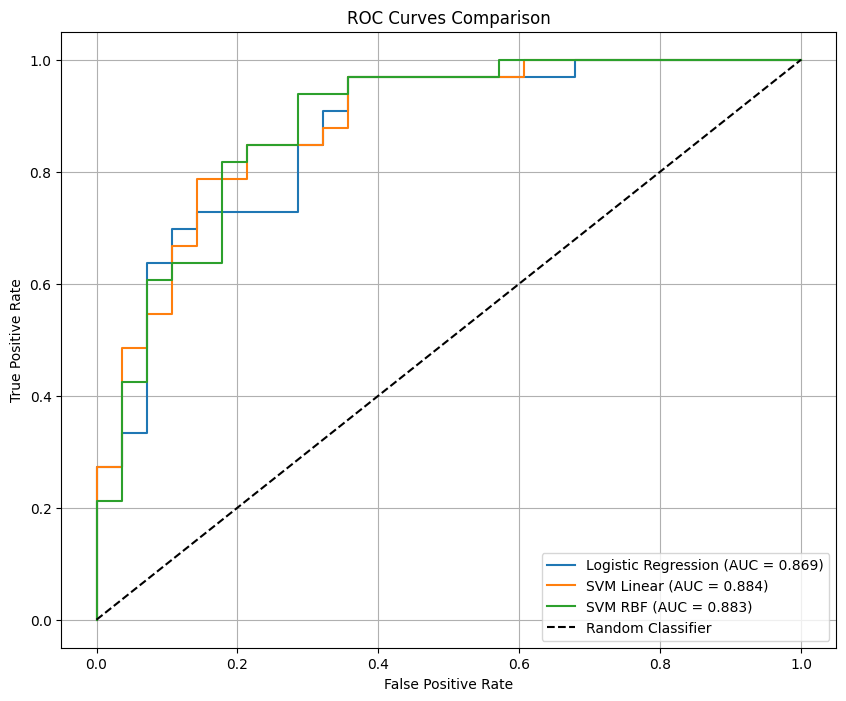

In [123]:
# Визуализация ROC кривых
plt.figure(figsize=(10, 8))

fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_svm_linear, tpr_svm_linear, _ = roc_curve(y_test, y_proba_svm_linear)
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, y_proba_svm_rbf)

plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {metrics_log["ROC AUC"]:.3f})')
plt.plot(fpr_svm_linear, tpr_svm_linear, label=f'SVM Linear (AUC = {metrics_svm_linear["ROC AUC"]:.3f})')
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label=f'SVM RBF (AUC = {metrics_svm_rbf["ROC AUC"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True)
plt.show()

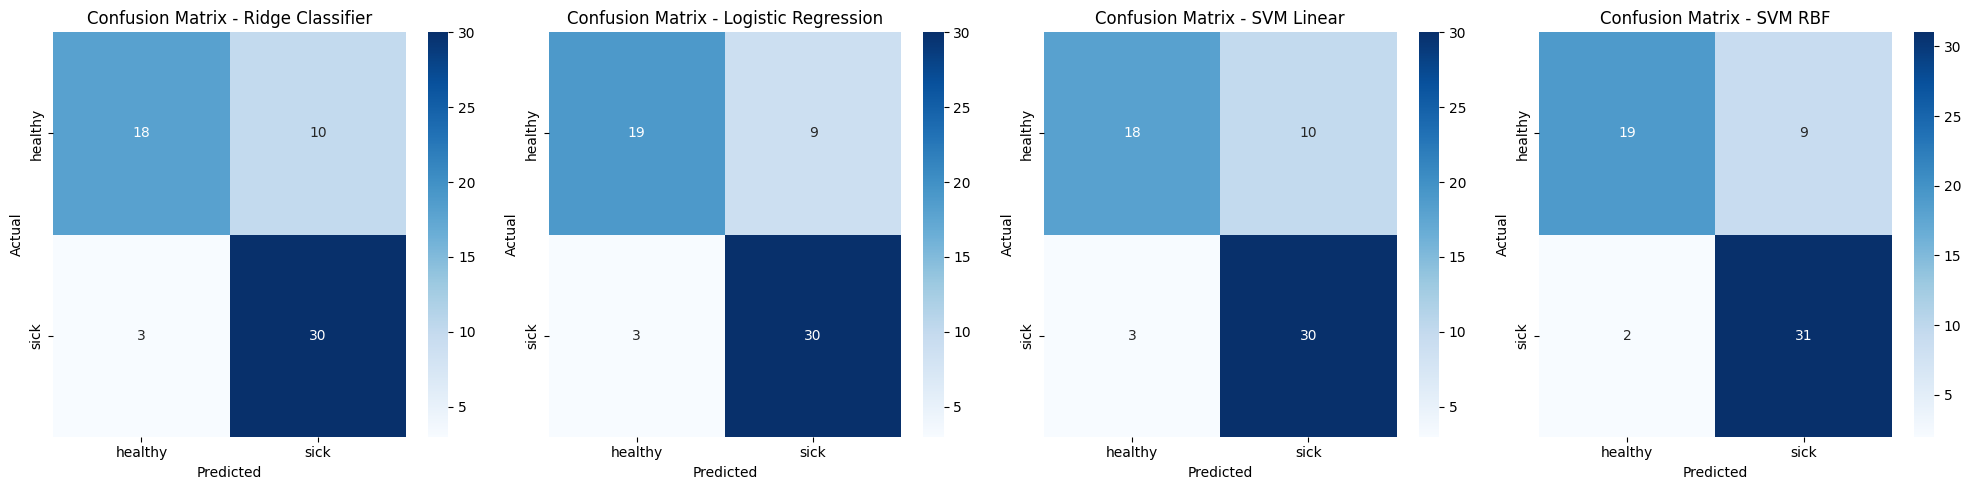

In [130]:
# Матрицы ошибок
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

models = [('Ridge Classifier', y_pred_lin),
          ('Logistic Regression', y_pred_log), 
          ('SVM Linear', y_pred_svm_linear), 
          ('SVM RBF', y_pred_svm_rbf)]

for i, (name, y_pred) in enumerate(models):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=target_names, yticklabels=target_names, ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [132]:
print("Кросс-валидация (5 folds):")

cv_scores_lin = cross_val_score(lin_clf, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_log = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_svm_linear = cross_val_score(svm_linear, X_train_scaled, y_train, cv=5, scoring='accuracy')
cv_scores_svm_rbf = cross_val_score(svm_rbf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Ridge Classifier CV Accuracy: {cv_scores_log.mean():.4f} (±{cv_scores_log.std():.4f})")
print(f"Logistic Regression CV Accuracy: {cv_scores_log.mean():.4f} (±{cv_scores_log.std():.4f})")
print(f"SVM Linear CV Accuracy: {cv_scores_svm_linear.mean():.4f} (±{cv_scores_svm_linear.std():.4f})")
print(f"SVM RBF CV Accuracy: {cv_scores_svm_rbf.mean():.4f} (±{cv_scores_svm_rbf.std():.4f})")

# Вывод лучшей модели
best_model = max([('Ridge Classifier', metrics_lin['Accuracy']),
                  ('Logistic Regression', metrics_log['Accuracy']),
                  ('SVM Linear', metrics_svm_linear['Accuracy']),
                  ('SVM RBF', metrics_svm_rbf['Accuracy'])], 
                 key=lambda x: x[1])

print(f"\nЛучшая модель: {best_model[0]} с точностью {best_model[1]:.4f}")

Кросс-валидация (5 folds):
Ridge Classifier CV Accuracy: 0.8309 (±0.0409)
Logistic Regression CV Accuracy: 0.8309 (±0.0409)
SVM Linear CV Accuracy: 0.8393 (±0.0461)
SVM RBF CV Accuracy: 0.8020 (±0.0388)

Лучшая модель: SVM RBF с точностью 0.8197


In [143]:
coef_results = pd.DataFrame({"ridge": lin_clf.coef_, "logreg": log_reg.coef_[0], "svm": svm_linear.coef_[0]}, index=feature_col)
coef_results

,ridge,logreg,svm
age,-0.005656,0.017736,0.017517
sex,-0.153400,-0.714030,-0.451142
cp,0.263012,0.937735,0.741343
trestbps,-0.037392,-0.211437,-0.189578
chol,-0.083818,-0.459210,-0.218996
fbs,-0.001415,-0.063649,0.046111
restecg,0.047901,0.235471,0.095748
thalach,0.127352,0.539629,0.302044
exang,-0.142976,-0.475883,-0.297806
oldpeak,-0.146808,-0.594819,-0.496127


ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
Топ-10 самых важных признаков:
             Feature  Coefficient  Abs_Coefficient  Odds_Ratio
       worst texture    -1.350606         1.350606    0.259083
        radius error    -1.268178         1.268178    0.281344
      worst symmetry    -1.208200         1.208200    0.298734
 mean concave points    -1.119804         1.119804    0.326344
     worst concavity    -0.943053         0.943053    0.389437
          area error    -0.907186         0.907186    0.403659
        worst radius    -0.879840         0.879840    0.414849
          worst area    -0.841846         0.841846    0.430914
      mean concavity    -0.801458         0.801458    0.448674
worst concave points    -0.778217         0.778217    0.459224

Свободный член (intercept): 0.4456


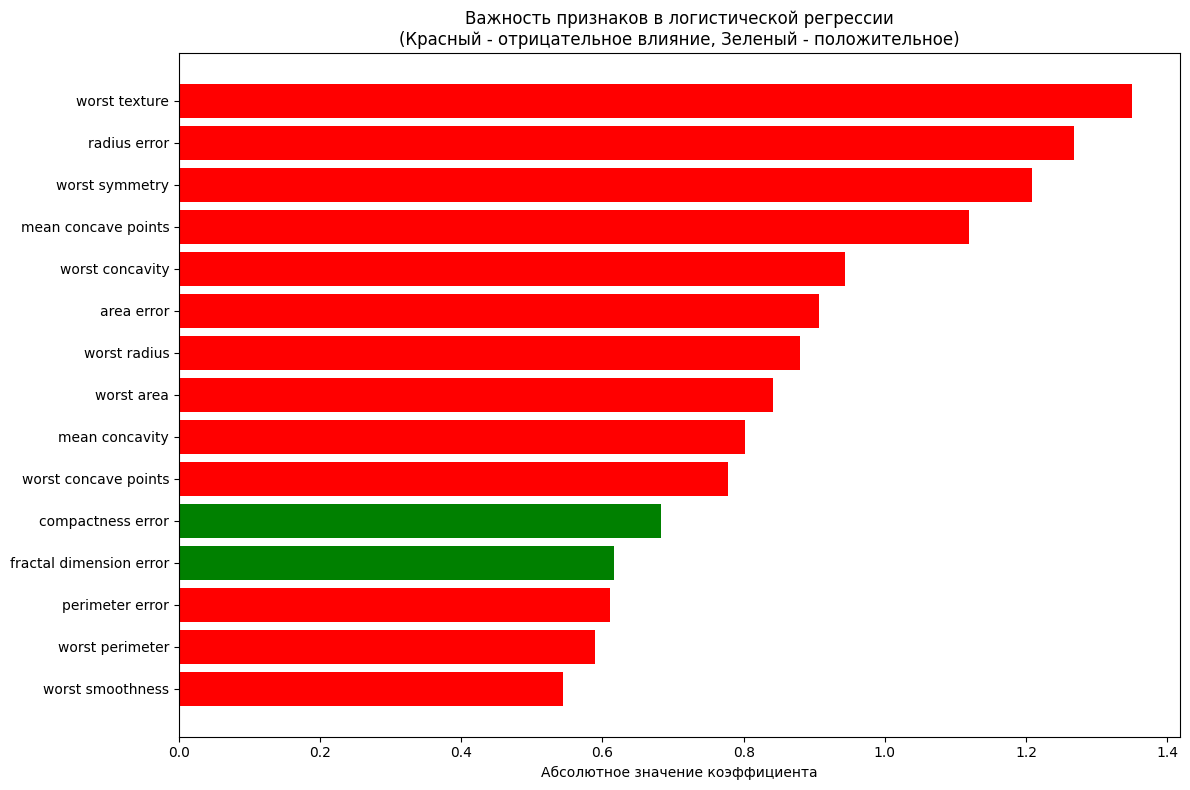


ИНТЕРПРЕТАЦИЯ В ТЕРМИНАХ ODDS RATIO
Топ-5 признаков с наибольшим влиянием на odds ratio:
                Feature  Odds_Ratio
      compactness error    1.978802
fractal dimension error    1.851933
       mean compactness    1.716288
         symmetry error    1.649422
          mean symmetry    1.266324

Топ-5 признаков с наименьшим влиянием на odds ratio:
            Feature  Odds_Ratio
    worst concavity    0.389437
mean concave points    0.326344
     worst symmetry    0.298734
       radius error    0.281344
      worst texture    0.259083

Пример интерпретации:
Признак 'worst texture':
- Коэффициент: -1.3506
- Odds Ratio: 0.2591
- Интерпретация: При увеличении признака на 1 стандартное отклонение,
  шансы принадлежности к классу 1 увеличиваются в 0.26 раз


In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Разделение и масштабирование
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение логистической регрессии
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Интерпретация коэффициентов
print("="*60)
print("ИНТЕРПРЕТАЦИЯ КОЭФФИЦИЕНТОВ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ")
print("="*60)

# Создаем DataFrame с коэффициентами
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': log_reg.coef_[0],
    'Abs_Coefficient': np.abs(log_reg.coef_[0]),
    'Odds_Ratio': np.exp(log_reg.coef_[0])
})

# Сортируем по абсолютному значению
coef_df = coef_df.sort_values('Abs_Coefficient', ascending=False)

print("Топ-10 самых важных признаков:")
print(coef_df.head(10).to_string(index=False))

print(f"\nСвободный член (intercept): {log_reg.intercept_[0]:.4f}")

# Визуализация важности признаков
plt.figure(figsize=(12, 8))
top_features = coef_df.head(15)
colors = ['red' if coef < 0 else 'green' for coef in top_features['Coefficient']]

plt.barh(top_features['Feature'], top_features['Abs_Coefficient'], color=colors)
plt.xlabel('Абсолютное значение коэффициента')
plt.title('Важность признаков в логистической регрессии\n(Красный - отрицательное влияние, Зеленый - положительное)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Интерпретация в терминах odds ratio
print("\n" + "="*60)
print("ИНТЕРПРЕТАЦИЯ В ТЕРМИНАХ ODDS RATIO")
print("="*60)

print("Топ-5 признаков с наибольшим влиянием на odds ratio:")
odds_ratio_df = coef_df.sort_values('Odds_Ratio', ascending=False)
print(odds_ratio_df[['Feature', 'Odds_Ratio']].head(5).to_string(index=False))

print("\nТоп-5 признаков с наименьшим влиянием на odds ratio:")
print(odds_ratio_df[['Feature', 'Odds_Ratio']].tail(5).to_string(index=False))

# Пример интерпретации для конкретного признака
print(f"\nПример интерпретации:")
print(f"Признак '{top_features.iloc[0]['Feature']}':")
print(f"- Коэффициент: {top_features.iloc[0]['Coefficient']:.4f}")
print(f"- Odds Ratio: {top_features.iloc[0]['Odds_Ratio']:.4f}")
print(f"- Интерпретация: При увеличении признака на 1 стандартное отклонение,")
print(f"  шансы принадлежности к классу 1 увеличиваются в {top_features.iloc[0]['Odds_Ratio']:.2f} раз")


ВИЗУАЛИЗАЦИЯ РАЗДЕЛЯЮЩЕЙ ГИПЕРПЛОСКОСТИ


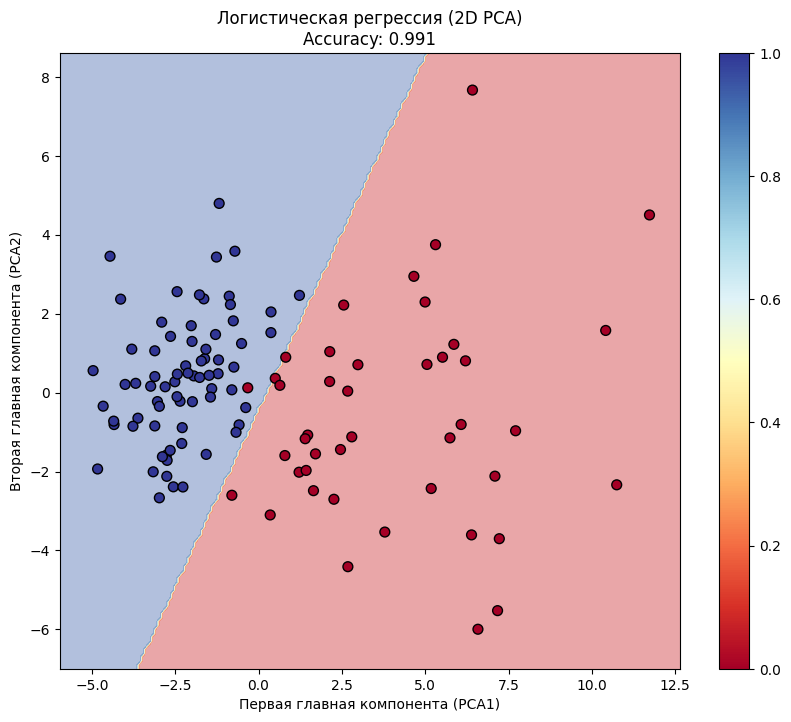

Логистическая регрессия (2D PCA):
Уравнение гиперплоскости: -1.904*x1 + 1.062*x2 + 0.479 = 0
Нормаль к гиперплоскости: [-1.904, 1.062]


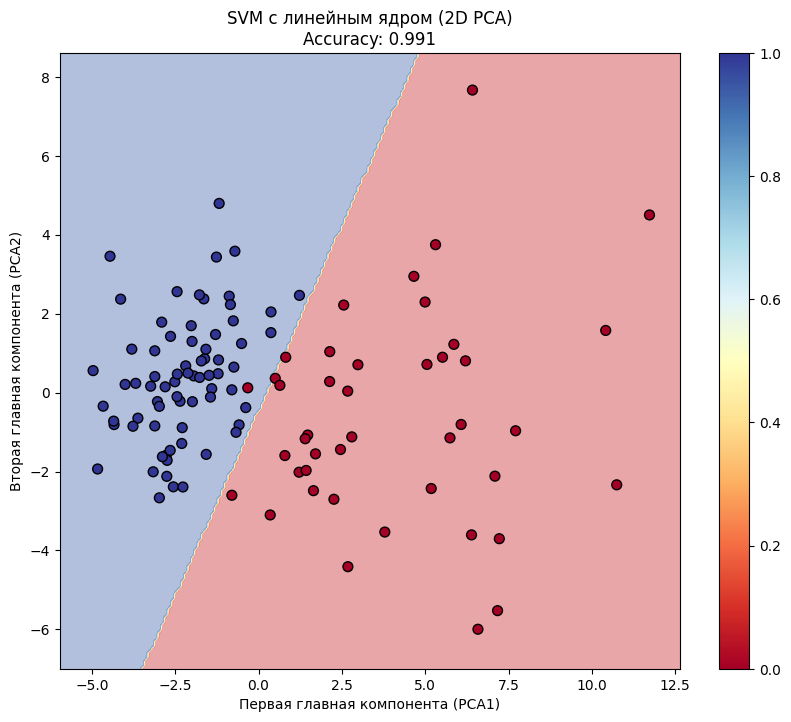

SVM с линейным ядром (2D PCA):
Уравнение гиперплоскости: -1.340*x1 + 0.714*x2 + 0.336 = 0
Нормаль к гиперплоскости: [-1.340, 0.714]


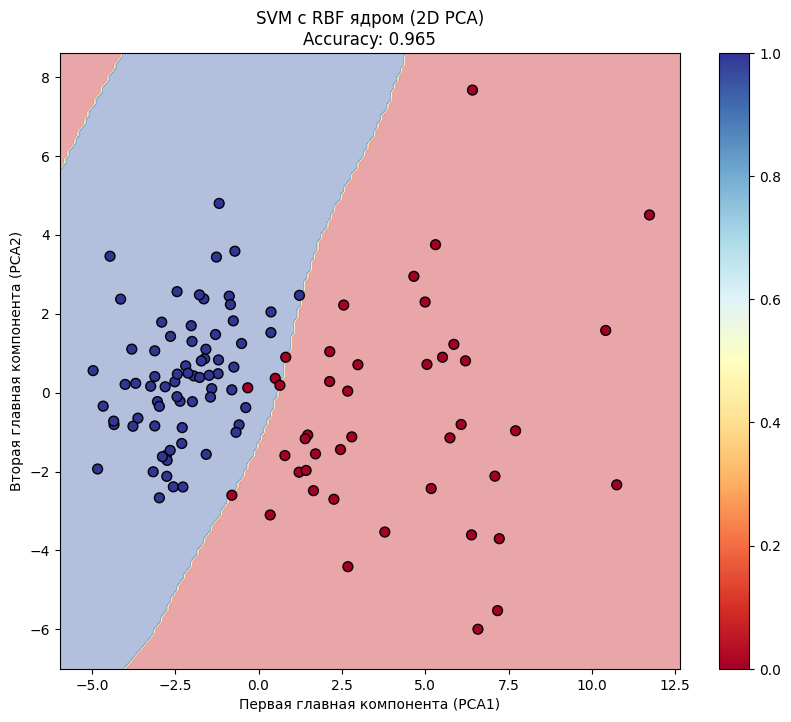

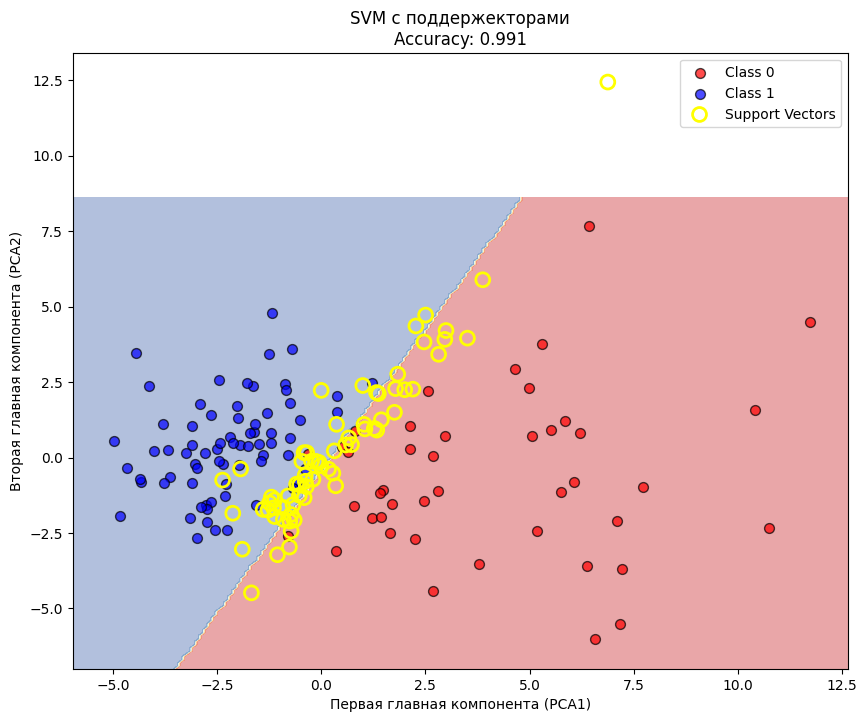

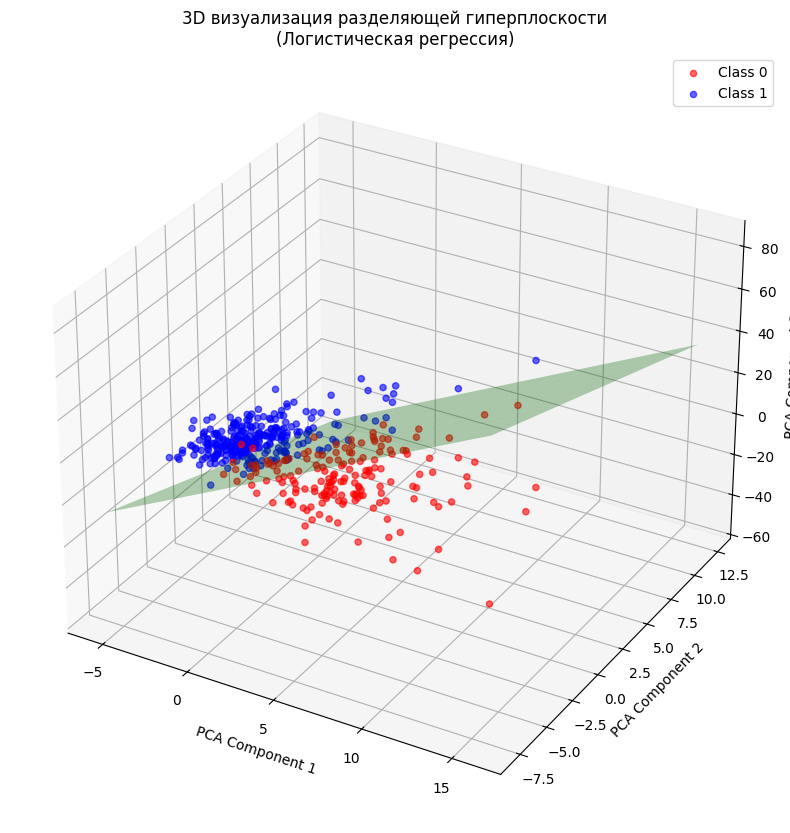

Уравнение разделяющей гиперплоскости в 3D:
-1.930*x + 1.070*y + 0.471*z + 0.696 = 0


In [145]:
# Визуализация разделяющей гиперплоскости
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ РАЗДЕЛЯЮЩЕЙ ГИПЕРПЛОСКОСТИ")
print("="*60)

# Используем PCA для уменьшения размерности до 2D для визуализации
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Обучаем модели на 2D данных
log_reg_2d = LogisticRegression(random_state=42)
log_reg_2d.fit(X_train_pca, y_train)

svm_linear_2d = SVC(kernel='linear', random_state=42)
svm_linear_2d.fit(X_train_pca, y_train)

svm_rbf_2d = SVC(kernel='rbf', random_state=42)
svm_rbf_2d.fit(X_train_pca, y_train)

# Функция для визуализации решающих границ
def plot_decision_boundary(model, X, y, title):
    # Создаем сетку для визуализации
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Предсказания для сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Визуализация
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap='RdYlBu')
    plt.title(f'{title}\nAccuracy: {accuracy_score(y, model.predict(X)):.3f}')
    plt.xlabel('Первая главная компонента (PCA1)')
    plt.ylabel('Вторая главная компонента (PCA2)')
    plt.colorbar()
    plt.show()
    
    # Вывод информации о модели
    if hasattr(model, 'coef_'):
        print(f"{title}:")
        print(f"Уравнение гиперплоскости: {model.coef_[0][0]:.3f}*x1 + {model.coef_[0][1]:.3f}*x2 + {model.intercept_[0]:.3f} = 0")
        print(f"Нормаль к гиперплоскости: [{model.coef_[0][0]:.3f}, {model.coef_[0][1]:.3f}]")

# Визуализация для разных моделей
plot_decision_boundary(log_reg_2d, X_test_pca, y_test, "Логистическая регрессия (2D PCA)")
plot_decision_boundary(svm_linear_2d, X_test_pca, y_test, "SVM с линейным ядром (2D PCA)")
plot_decision_boundary(svm_rbf_2d, X_test_pca, y_test, "SVM с RBF ядром (2D PCA)")

# Визуализация с поддержекторами для SVM
def plot_svm_decision_boundary(model, X, y, title):
    # Создаем сетку
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Предсказания для сетки
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Визуализация с поддержекторами
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    
    # Разные маркеры для разных классов
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red', s=50, edgecolor='k', 
                label='Class 0', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', s=50, edgecolor='k', 
                label='Class 1', alpha=0.7)
    
    # Подсветка поддержекторов
    if hasattr(model, 'support_vectors_'):
        support_vectors = model.support_vectors_
        plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
                   s=100, facecolors='none', edgecolors='yellow', 
                   linewidths=2, label='Support Vectors')
    
    plt.title(f'{title}\nAccuracy: {accuracy_score(y, model.predict(X)):.3f}')
    plt.xlabel('Первая главная компонента (PCA1)')
    plt.ylabel('Вторая главная компонента (PCA2)')
    plt.legend()
    plt.show()

plot_svm_decision_boundary(svm_linear_2d, X_test_pca, y_test, "SVM с поддержекторами")

# 3D визуализация разделяющей гиперплоскости
from mpl_toolkits.mplot3d import Axes3D

# Используем PCA для 3 компонент
pca_3d = PCA(n_components=3)
X_train_3d = pca_3d.fit_transform(X_train_scaled)

# Обучаем модель на 3D данных
log_reg_3d = LogisticRegression(random_state=42)
log_reg_3d.fit(X_train_3d, y_train)

# 3D визуализация
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Точки данных
ax.scatter(X_train_3d[y_train == 0, 0], X_train_3d[y_train == 0, 1], X_train_3d[y_train == 0, 2], 
          c='red', label='Class 0', alpha=0.6)
ax.scatter(X_train_3d[y_train == 1, 0], X_train_3d[y_train == 1, 1], X_train_3d[y_train == 1, 2], 
          c='blue', label='Class 1', alpha=0.6)

# Создаем сетку для гиперплоскости
xx, yy = np.meshgrid(np.linspace(X_train_3d[:, 0].min(), X_train_3d[:, 0].max(), 10),
                     np.linspace(X_train_3d[:, 1].min(), X_train_3d[:, 1].max(), 10))

# Уравнение гиперплоскости: w0*x + w1*y + w2*z + b = 0 → z = (-w0*x - w1*y - b)/w2
w = log_reg_3d.coef_[0]
b = log_reg_3d.intercept_[0]
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Рисуем гиперплоскость
ax.plot_surface(xx, yy, zz, alpha=0.3, color='green')

ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D визуализация разделяющей гиперплоскости\n(Логистическая регрессия)')
ax.legend()
plt.show()

print("Уравнение разделяющей гиперплоскости в 3D:")
print(f"{w[0]:.3f}*x + {w[1]:.3f}*y + {w[2]:.3f}*z + {b:.3f} = 0")

In [146]:
# Практическая интерпретация для медицинского контекста
print("\n" + "="*60)
print("ПРАКТИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ДЛЯ ВРАЧА")
print("="*60)

# Самые важные признаки для диагностики
top_medical_features = coef_df.head(5)

for _, row in top_medical_features.iterrows():
    feature_name = row['Feature']
    coef_value = row['Coefficient']
    odds_ratio = row['Odds_Ratio']
    
    interpretation = "увеличивает" if coef_value > 0 else "уменьшает"
    effect = "вероятность злокачественной опухоли" if "mean" in feature_name else "риск заболевания"
    
    print(f"• {feature_name}:")
    print(f"  - {interpretation} {effect}")
    print(f"  - При увеличении на 1 STD, шансы увеличиваются в {odds_ratio:.2f} раз")
    print()

# Пример прогноза для конкретного пациента
print("ПРИМЕР ПРОГНОЗА ДЛЯ ПАЦИЕНТА:")
sample_patient = X_test_scaled[0:1]
probabilities = log_reg.predict_proba(sample_patient)[0]

print(f"Вероятность класса 0 (доброкачественный): {probabilities[0]:.3f}")
print(f"Вероятность класса 1 (злокачественный): {probabilities[1]:.3f}")

# Вклад каждого признака в решение
feature_contributions = sample_patient * log_reg.coef_[0]
most_influential_idx = np.argmax(np.abs(feature_contributions))

print(f"\nСамый влиятельный признак для этого пациента: {feature_names[most_influential_idx]}")
print(f"Его вклад: {feature_contributions[0, most_influential_idx]:.4f}")


ПРАКТИЧЕСКАЯ ИНТЕРПРЕТАЦИЯ ДЛЯ ВРАЧА
• worst texture:
  - уменьшает риск заболевания
  - При увеличении на 1 STD, шансы увеличиваются в 0.26 раз

• radius error:
  - уменьшает риск заболевания
  - При увеличении на 1 STD, шансы увеличиваются в 0.28 раз

• worst symmetry:
  - уменьшает риск заболевания
  - При увеличении на 1 STD, шансы увеличиваются в 0.30 раз

• mean concave points:
  - уменьшает вероятность злокачественной опухоли
  - При увеличении на 1 STD, шансы увеличиваются в 0.33 раз

• worst concavity:
  - уменьшает риск заболевания
  - При увеличении на 1 STD, шансы увеличиваются в 0.39 раз

ПРИМЕР ПРОГНОЗА ДЛЯ ПАЦИЕНТА:
Вероятность класса 0 (доброкачественный): 0.114
Вероятность класса 1 (злокачественный): 0.886

Самый влиятельный признак для этого пациента: mean concave points
Его вклад: 0.2966


Размерность данных: (569, 30)
Баланс классов: [212 357]
ПОДБОР ГИПЕРПАРАМЕТРОВ ДЛЯ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Время поиска: 5.37 секунд
Лучшие параметры: {'C': np.float64(0.0517947467923121), 'penalty': 'l2', 'solver': 'liblinear'}
Лучшая точность: 0.9802

ПОДБОР ГИПЕРПАРАМЕТРОВ ДЛЯ SVM
Fitting 5 folds for each of 40 candidates, totalling 200 fits
Время поиска: 0.93 секунд
Лучшие параметры: {'C': np.float64(0.0774263682681127), 'gamma': 'scale', 'kernel': 'linear'}
Лучшая точность: 0.9802

ВИЗУАЛИЗАЦИЯ ВЛИЯНИЯ ПАРАМЕТРА C


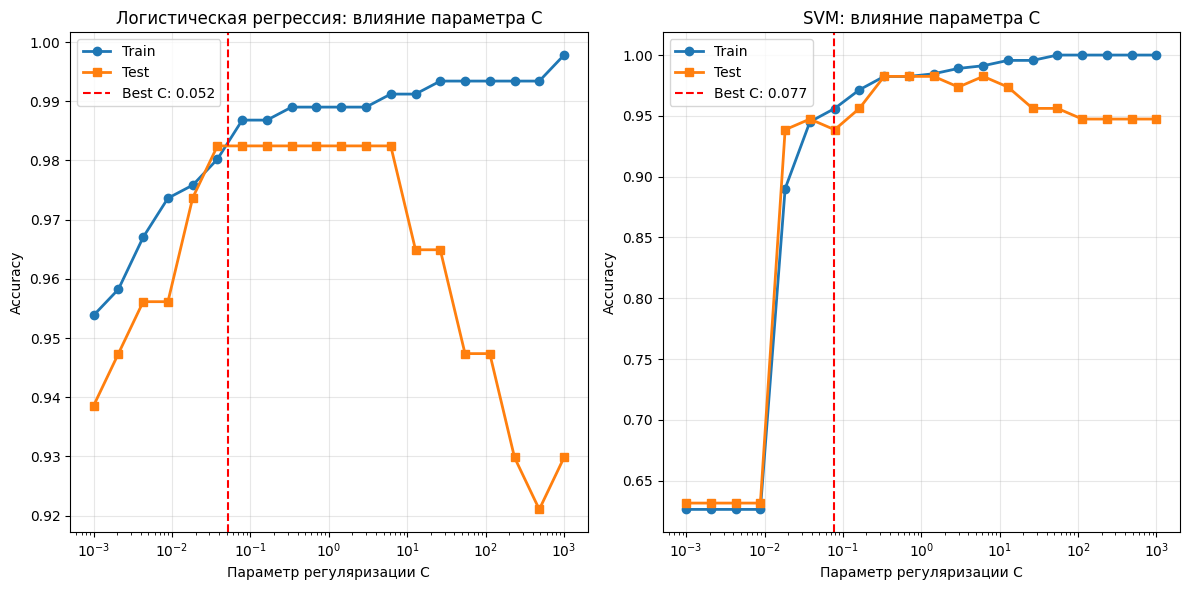


КРОСС-ВАЛИДАЦИЯ С ЛУЧШИМИ ПАРАМЕТРАМИ
Логистическая регрессия CV Accuracy: 0.9802 (±0.0128)
SVM CV Accuracy: 0.9802 (±0.0162)

СРАВНЕНИЕ МОДЕЛЕЙ НА ТЕСТОВОМ НАБОРЕ

Логистическая регрессия (C=0.052):
Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1-Score: 0.9861
ROC AUC: 0.9960

SVM (C=0.0774263682681127, kernel=linear):
Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1-Score: 0.9861
ROC AUC: 0.9937


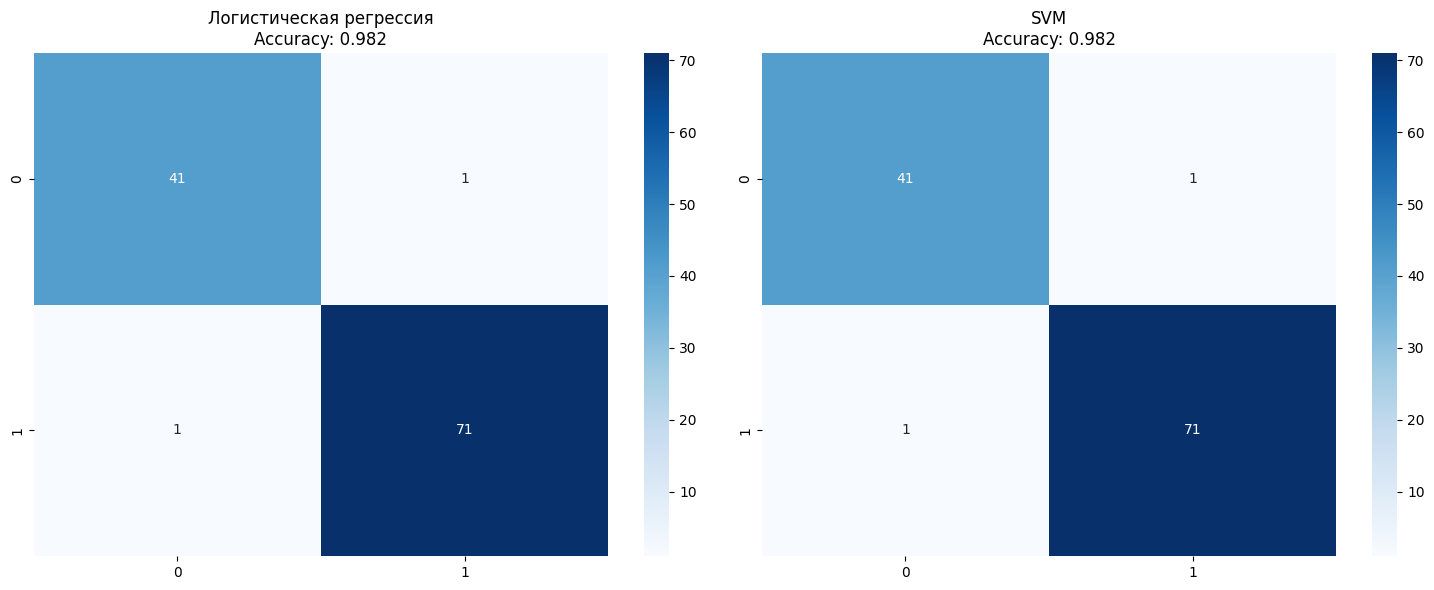


АНАЛИЗ КОЭФФИЦИЕНТОВ ПОСЛЕ РЕГУЛЯРИЗАЦИИ
Топ-10 самых важных признаков после регуляризации:
             Feature  Coefficient  Abs_Coefficient
       worst texture    -0.427458         0.427458
        worst radius    -0.424909         0.424909
worst concave points    -0.404914         0.404914
          worst area    -0.404526         0.404526
     worst perimeter    -0.397385         0.397385
        radius error    -0.350915         0.350915
 mean concave points    -0.350050         0.350050
        mean texture    -0.349720         0.349720
         mean radius    -0.340069         0.340069
           mean area    -0.339451         0.339451


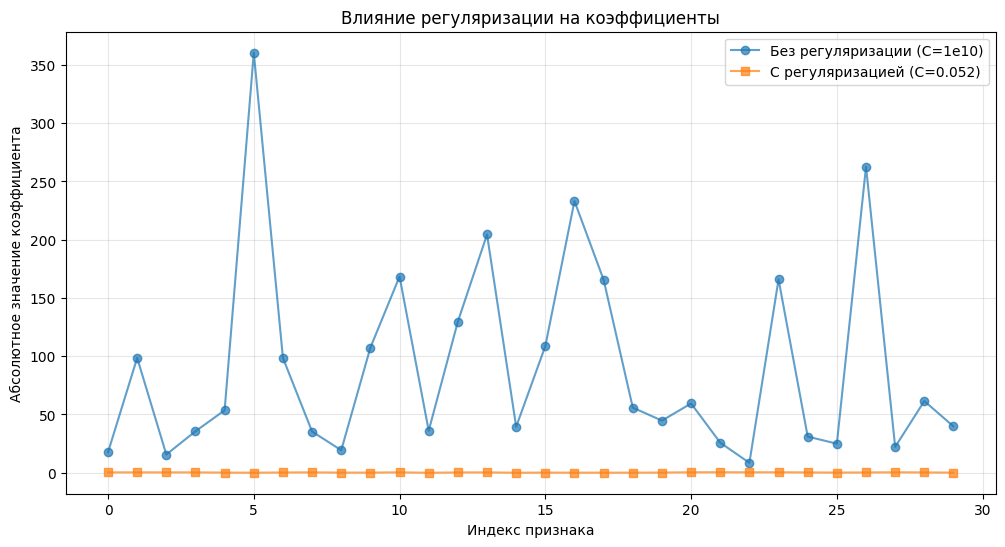


Норма коэффициентов без регуляризации: 681.042
Норма коэффициентов с регуляризацией: 1.500


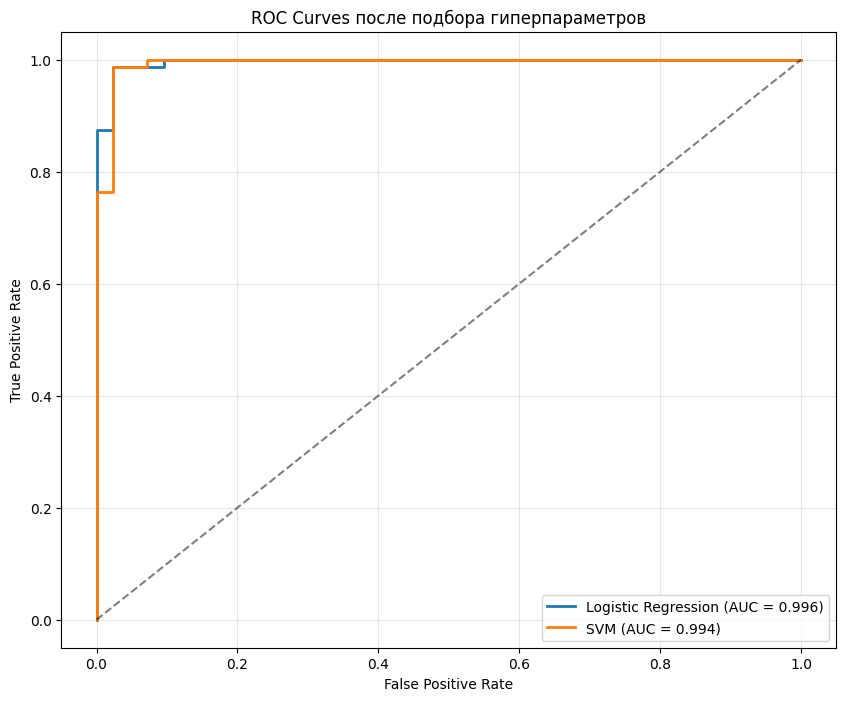


ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ GRIDSEARCH
Лучшие 5 комбинаций для логистической регрессии:
 param_C param_penalty  mean_test_score  std_test_score
0.138950            l2         0.980220        0.010767
0.051795            l2         0.980220        0.012815
0.372759            l2         0.980220        0.012815
1.000000            l2         0.980220        0.012815
0.372759            l1         0.978022        0.009829

Лучшие 5 комбинаций для SVM:
 param_C param_kernel param_gamma  mean_test_score  std_test_score
0.077426       linear        auto         0.980220        0.016150
0.077426       linear       scale         0.980220        0.016150
0.215443       linear       scale         0.978022        0.015541
0.215443       linear        auto         0.978022        0.015541
4.641589          rbf       scale         0.975824        0.016150


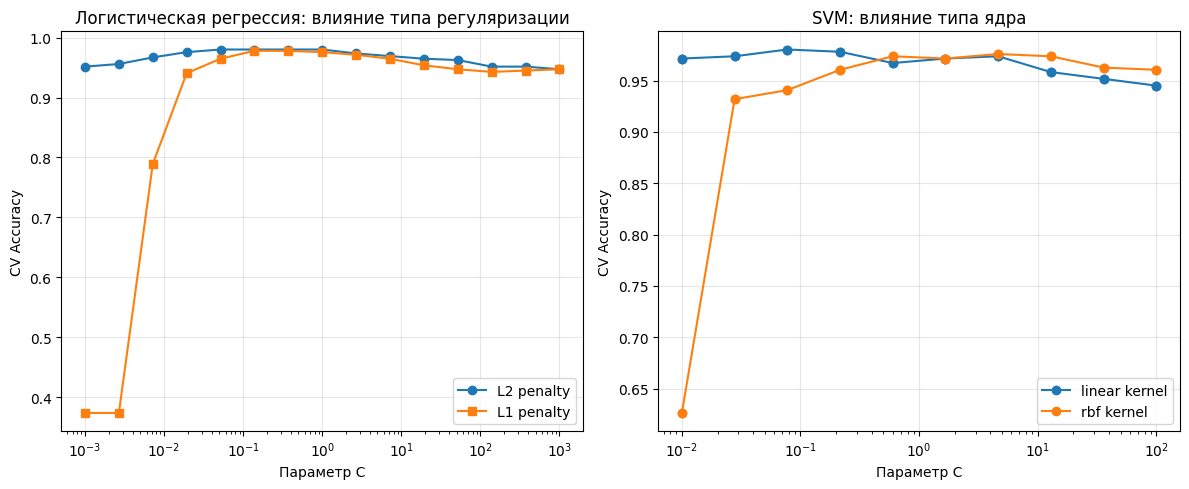


ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ
ЛУЧШАЯ МОДЕЛЬ: Logistic Regression
Точность: 0.9825

Параметры лучшей модели:
{'C': np.float64(0.0517947467923121), 'penalty': 'l2', 'solver': 'liblinear'}


In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report, 
                           roc_auc_score, roc_curve, make_scorer)
from sklearn.decomposition import PCA
import time

# Загрузка данных
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

print(f"Размерность данных: {X.shape}")
print(f"Баланс классов: {np.bincount(y)}")

# Разделение на train и test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Определение метрик для оценки
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

print("="*60)
print("ПОДБОР ГИПЕРПАРАМЕТРОВ ДЛЯ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ")
print("="*60)

# Подбор параметров для логистической регрессии
param_grid_log = {
    'C': np.logspace(-4, 4, 20),  # Регуляризационный параметр
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]  # Для elasticnet
}

# Упрощенная сетка для быстрого поиска
param_grid_log_simple = {
    'C': np.logspace(-3, 3, 15),
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear']
}

start_time = time.time()
grid_log = GridSearchCV(
    LogisticRegression(random_state=42, max_iter=10000),
    param_grid_log_simple,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_log.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"Время поиска: {end_time - start_time:.2f} секунд")
print(f"Лучшие параметры: {grid_log.best_params_}")
print(f"Лучшая точность: {grid_log.best_score_:.4f}")

# Обучение лучшей модели
best_log_reg = grid_log.best_estimator_
y_pred_log = best_log_reg.predict(X_test_scaled)
y_proba_log = best_log_reg.predict_proba(X_test_scaled)[:, 1]

print("\n" + "="*60)
print("ПОДБОР ГИПЕРПАРАМЕТРОВ ДЛЯ SVM")
print("="*60)

# Подбор параметров для SVM
param_grid_svm = {
    'C': np.logspace(-3, 3, 15),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 2, 10)),
    'degree': [2, 3, 4]  # Для полиномиального ядра
}

# Упрощенная сетка
param_grid_svm_simple = {
    'C': np.logspace(-2, 2, 10),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

start_time = time.time()
grid_svm = GridSearchCV(
    SVC(random_state=42, probability=True),
    param_grid_svm_simple,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_svm.fit(X_train_scaled, y_train)
end_time = time.time()

print(f"Время поиска: {end_time - start_time:.2f} секунд")
print(f"Лучшие параметры: {grid_svm.best_params_}")
print(f"Лучшая точность: {grid_svm.best_score_:.4f}")

# Обучение лучшей SVM модели
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test_scaled)
y_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]

# Визуализация влияния параметра C
print("\n" + "="*60)
print("ВИЗУАЛИЗАЦИЯ ВЛИЯНИЯ ПАРАМЕТРА C")
print("="*60)

# Анализ влияния C для логистической регрессии
C_values = np.logspace(-3, 3, 20)
train_scores = []
test_scores = []

for C_val in C_values:
    model = LogisticRegression(C=C_val, penalty='l2', solver='liblinear', random_state=42)
    model.fit(X_train_scaled, y_train)
    
    train_score = accuracy_score(y_train, model.predict(X_train_scaled))
    test_score = accuracy_score(y_test, model.predict(X_test_scaled))
    
    train_scores.append(train_score)
    test_scores.append(test_score)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.semilogx(C_values, train_scores, 'o-', label='Train', linewidth=2)
plt.semilogx(C_values, test_scores, 's-', label='Test', linewidth=2)
plt.axvline(grid_log.best_params_['C'], color='red', linestyle='--', 
           label=f'Best C: {grid_log.best_params_["C"]:.3f}')
plt.xlabel('Параметр регуляризации C')
plt.ylabel('Accuracy')
plt.title('Логистическая регрессия: влияние параметра C')
plt.legend()
plt.grid(True, alpha=0.3)

# Анализ влияния C для SVM
train_scores_svm = []
test_scores_svm = []

for C_val in C_values:
    model = SVC(C=C_val, kernel='rbf', gamma='scale', random_state=42)
    model.fit(X_train_scaled, y_train)
    
    train_score = accuracy_score(y_train, model.predict(X_train_scaled))
    test_score = accuracy_score(y_test, model.predict(X_test_scaled))
    
    train_scores_svm.append(train_score)
    test_scores_svm.append(test_score)

plt.subplot(1, 2, 2)
plt.semilogx(C_values, train_scores_svm, 'o-', label='Train', linewidth=2)
plt.semilogx(C_values, test_scores_svm, 's-', label='Test', linewidth=2)
plt.axvline(grid_svm.best_params_['C'], color='red', linestyle='--', 
           label=f'Best C: {grid_svm.best_params_["C"]:.3f}')
plt.xlabel('Параметр регуляризации C')
plt.ylabel('Accuracy')
plt.title('SVM: влияние параметра C')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Кросс-валидация с лучшими параметрами
print("\n" + "="*60)
print("КРОСС-ВАЛИДАЦИЯ С ЛУЧШИМИ ПАРАМЕТРАМИ")
print("="*60)

cv_scores_log = cross_val_score(best_log_reg, X_train_scaled, y_train, 
                               cv=5, scoring='accuracy')
cv_scores_svm = cross_val_score(best_svm, X_train_scaled, y_train, 
                               cv=5, scoring='accuracy')

print(f"Логистическая регрессия CV Accuracy: {cv_scores_log.mean():.4f} (±{cv_scores_log.std():.4f})")
print(f"SVM CV Accuracy: {cv_scores_svm.mean():.4f} (±{cv_scores_svm.std():.4f})")

# Сравнение метрик на тестовом наборе
def evaluate_model(y_true, y_pred, y_proba, model_name):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }
    
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    
    return metrics

print("\n" + "="*60)
print("СРАВНЕНИЕ МОДЕЛЕЙ НА ТЕСТОВОМ НАБОРЕ")
print("="*60)

metrics_log = evaluate_model(y_test, y_pred_log, y_proba_log, 
                           f"Логистическая регрессия (C={grid_log.best_params_['C']:.3f})")

metrics_svm = evaluate_model(y_test, y_pred_svm, y_proba_svm, 
                           f"SVM (C={grid_svm.best_params_['C']}, kernel={grid_svm.best_params_['kernel']})")

# Матрицы ошибок
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

cm_log = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Логистическая регрессия\nAccuracy: {metrics_log["Accuracy"]:.3f}')

cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title(f'SVM\nAccuracy: {metrics_svm["Accuracy"]:.3f}')

plt.tight_layout()
plt.show()

# Анализ коэффициентов после регуляризации
print("\n" + "="*60)
print("АНАЛИЗ КОЭФФИЦИЕНТОВ ПОСЛЕ РЕГУЛЯРИЗАЦИИ")
print("="*60)

coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': best_log_reg.coef_[0],
    'Abs_Coefficient': np.abs(best_log_reg.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("Топ-10 самых важных признаков после регуляризации:")
print(coef_df.head(10).to_string(index=False))

# Сравнение с моделью без регуляризации
log_reg_no_reg = LogisticRegression(C=1e10, random_state=42)  # Почти без регуляризации
log_reg_no_reg.fit(X_train_scaled, y_train)

coef_no_reg = np.abs(log_reg_no_reg.coef_[0])
coef_reg = np.abs(best_log_reg.coef_[0])

plt.figure(figsize=(12, 6))
plt.plot(coef_no_reg, 'o-', alpha=0.7, label='Без регуляризации (C=1e10)')
plt.plot(coef_reg, 's-', alpha=0.7, label=f'С регуляризацией (C={grid_log.best_params_["C"]:.3f})')
plt.xlabel('Индекс признака')
plt.ylabel('Абсолютное значение коэффициента')
plt.title('Влияние регуляризации на коэффициенты')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nНорма коэффициентов без регуляризации: {np.linalg.norm(coef_no_reg):.3f}")
print(f"Норма коэффициентов с регуляризацией: {np.linalg.norm(coef_reg):.3f}")

# ROC кривые
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

plt.figure(figsize=(10, 8))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {metrics_log["ROC AUC"]:.3f})', linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {metrics_svm["ROC AUC"]:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves после подбора гиперпараметров')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Детальный анализ GridSearch результатов
print("\n" + "="*60)
print("ДЕТАЛЬНЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ GRIDSEARCH")
print("="*60)

# Результаты для логистической регрессии
results_log = pd.DataFrame(grid_log.cv_results_)
print("Лучшие 5 комбинаций для логистической регрессии:")
print(results_log[['param_C', 'param_penalty', 'mean_test_score', 'std_test_score']]
      .sort_values('mean_test_score', ascending=False).head(5).to_string(index=False))

# Результаты для SVM
results_svm = pd.DataFrame(grid_svm.cv_results_)
print("\nЛучшие 5 комбинаций для SVM:")
print(results_svm[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score', 'std_test_score']]
      .sort_values('mean_test_score', ascending=False).head(5).to_string(index=False))

# Визуализация поверхности поиска для параметра C
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.semilogx(results_log[results_log['param_penalty'] == 'l2']['param_C'], 
            results_log[results_log['param_penalty'] == 'l2']['mean_test_score'], 
            'o-', label='L2 penalty')
plt.semilogx(results_log[results_log['param_penalty'] == 'l1']['param_C'], 
            results_log[results_log['param_penalty'] == 'l1']['mean_test_score'], 
            's-', label='L1 penalty')
plt.xlabel('Параметр C')
plt.ylabel('CV Accuracy')
plt.title('Логистическая регрессия: влияние типа регуляризации')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
for kernel in results_svm['param_kernel'].unique():
    kernel_data = results_svm[results_svm['param_kernel'] == kernel]
    plt.semilogx(kernel_data['param_C'], kernel_data['mean_test_score'], 
                'o-', label=f'{kernel} kernel')
plt.xlabel('Параметр C')
plt.ylabel('CV Accuracy')
plt.title('SVM: влияние типа ядра')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод лучшей модели
final_results = {
    'Logistic Regression': metrics_log['Accuracy'],
    'SVM': metrics_svm['Accuracy']
}

best_model_name = max(final_results, key=final_results.get)
best_accuracy = final_results[best_model_name]

print("\n" + "="*60)
print("ФИНАЛЬНЫЕ РЕЗУЛЬТАТЫ")
print("="*60)
print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"Точность: {best_accuracy:.4f}")
print(f"\nПараметры лучшей модели:")
if best_model_name == 'Logistic Regression':
    print(grid_log.best_params_)
else:
    print(grid_svm.best_params_)